In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

try:
  df = pd.read_csv('<YOUR_FILEPATH>') # ignition_slope_data_unprocessed.csv
except FileNotFoundError:
  print("Error: File not found. Please upload the file.")
  exit()


In [6]:
df_clean = df.drop(columns=['fire_id', 'ig_date'], errors='ignore')
df_clean = df_clean.dropna() 

df_encoded = pd.get_dummies(df_clean, columns=['land_cover', 'ecoregion'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

pca = PCA()
pca_result = pca.fit_transform(scaled_features)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

Inspiration: [Link](https://medium.com/@sahin.samia/principal-component-analysis-pca-made-easy-a-complete-hands-on-guide-e26a3680c0bc)

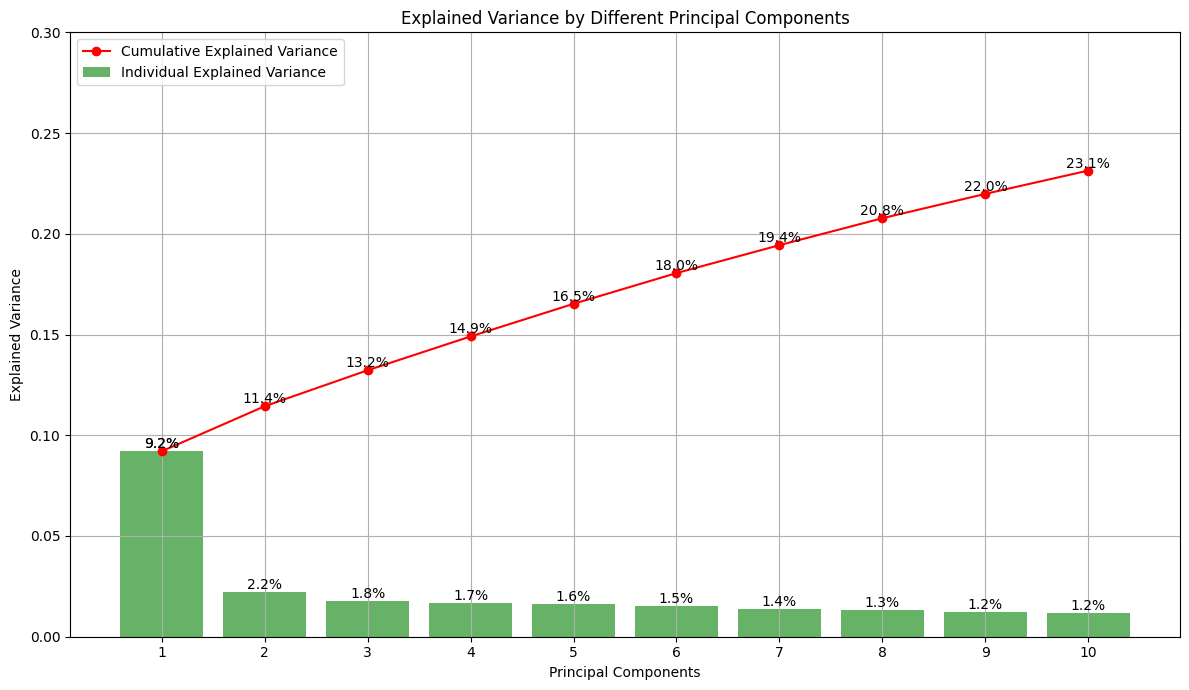

In [7]:
individual_variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(individual_variances)

n_components_to_plot = 10

plt.figure(figsize=(12, 7))
bars = plt.bar(range(1, n_components_to_plot + 1), individual_variances[:n_components_to_plot],
               alpha=0.6, color='g', label='Individual Explained Variance')
line = plt.plot(range(1, n_components_to_plot + 1), cumulative_variances[:n_components_to_plot],
                marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')

for i, (bar, cum_val) in enumerate(zip(bars, cumulative_variances[:n_components_to_plot])):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{individual_variances[i]*100:.1f}%', ha='center', va='bottom')
    plt.text(i + 1, cum_val,
             f'{cum_val*100:.1f}%', ha='center', va='bottom')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.xticks(range(1, n_components_to_plot + 1))
plt.legend(loc='upper left')
plt.ylim(0, 0.3) # 1.1 
plt.grid(True)
plt.tight_layout()
plt.show()
